In [32]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

#Original sandbox enovirenment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'afbf63d6-0acc-4f41-86b8-e8c18b7c2f9b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [33]:
import pandas as pd
#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [34]:
#This normalizes the data in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10848,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964524e+07,1.964524e+07,False,NaN,1,NaN,NaN,None,2024-03-05T10:58:00.000Z,66942.169711,7.546807e+10,72.3040,0.861187,2.805217,18.463713,55.939699,52.877197,51.950634,1.315095e+12,52.3471,1.405786e+12,None,2024-03-05T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 12:58:53.499157
1,1027,Ethereum,ETH,ethereum,8499,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201271e+08,1.201271e+08,True,NaN,2,NaN,NaN,None,2024-03-05T10:58:00.000Z,3713.229654,3.149496e+10,75.2534,0.693160,6.175375,13.818248,61.420003,65.313270,63.175336,4.460596e+11,17.7584,4.460596e+11,None,2024-03-05T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 12:58:53.499157
2,825,Tether USDt,USDT,tether,76960,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.000447e+11,1.038001e+11,True,NaN,3,NaN,NaN,None,2024-03-05T10:57:00.000Z,1.000480,1.377359e+11,57.8020,-0.001933,-0.030025,-0.013120,0.071864,-0.037790,0.050658,1.000928e+11,3.9849,1.038500e+11,None,2024-03-05T10:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-05 12:58:53.499157
3,1839,BNB,BNB,bnb,2082,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495414e+08,1.495414e+08,False,NaN,4,NaN,NaN,None,2024-03-05T10:57:00.000Z,420.554333,2.525322e+09,40.4280,0.559901,0.443535,5.373135,40.242216,32.238679,81.040237,6.289028e+10,2.5050,6.289028e+10,None,2024-03-05T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 12:58:53.499157
4,5426,Solana,SOL,solana,632,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.423154e+08,5.710414e+08,True,NaN,5,NaN,NaN,None,2024-03-05T10:58:00.000Z,131.997619,4.728174e+09,47.6040,1.526937,0.492945,17.833521,35.829430,31.456239,106.123470,5.838458e+10,2.3240,7.537611e+10,None,2024-03-05T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 12:58:53.499157
5,52,XRP,XRP,xrp,1239,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.466403e+10,9.998785e+10,False,NaN,6,NaN,NaN,None,2024-03-05T10:58:00.000Z,0.645691,4.135980e+09,74.2814,0.566933,-0.578034,15.310572,26.077954,12.724815,2.503628,3.529608e+10,1.4046,6.456912e+10,None,2024-03-05T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 12:58:53.499157
6,3408,USDC,USDC,usd-coin,17025,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.891280e+10,2.891280e+10,False,NaN,7,NaN,NaN,None,2024-03-05T10:58:00.000Z,0.999820,1.223111e+10,67.5660,-0.003385,-0.018454,-0.020252,-0.035552,-0.020278,-0.026579,2.890761e+10,1.1507,2.890761e+10,None,2024-03-05T10:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-05 12:58:53.499157
7,2010,Cardano,ADA,cardano,1088,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.548931e+10,3.667143e+10,False,NaN,8,NaN,NaN,None,2024-03-05T10:57:00.000Z,0.774209,1.430729e+09,10.8986,0.004094,-0.595905,24.068592,53.270091,41.024847,78.597492,2.747613e+10,1.0934,3.483940e+10,None,2024-03-05T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 12:58:53.499157
8,74,Dogecoin,DOGE,dogecoin,904,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.

In [88]:
def api_runner():
    global df
#Original sandbox enovirenment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'afbf63d6-0acc-4f41-86b8-e8c18b7c2f9b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

#This normalizes the data in a dataframe
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Brian Jantjies\Documents\Data Analysis Projects\Python\Web Scraping\Crypto API\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\Brian Jantjies\Documents\Data Analysis Projects\Python\Web Scraping\Crypto API\CryptoAPI.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Brian Jantjies\Documents\Data Analysis Projects\Python\Web Scraping\Crypto API\CryptoAPI.csv', mode='a', header=False)

# If that didn't work try using the local host URL as shown in the video

In [90]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [91]:
df72 = pd.read_csv(r'C:\Users\Brian Jantjies\Documents\Data Analysis Projects\Python\Web Scraping\Crypto API\CryptoAPI.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10849,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19645243.00000,19645243.00000,False,NaN,1,NaN,NaN,NaN,2024-03-05T11:13:00.000Z,66825.83103,75306756643.24077,71.04500,0.15851,2.67584,18.21037,55.49874,52.74546,52.13174,1312809689196.51831,52.28110,1403342451560.76001,NaN,2024-03-05T11:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:14:12.931722
1,1,1027,Ethereum,ETH,ethereum,8499,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120127131.78995,120127131.78995,True,NaN,2,NaN,NaN,NaN,2024-03-05T11:13:00.000Z,3724.16111,31457155274.15095,73.98170,0.78145,6.26574,14.12965,61.70655,65.94987,64.40389,447372792715.41760,17.81790,447372792715.41998,NaN,2024-03-05T11:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:14:12.931722
2,2,825,Tether USDt,USDT,tether,76965,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,100044694548.97124,103800078701.87814,True,NaN,3,NaN,NaN,NaN,2024-03-05T11:12:00.000Z,1.00047,137576164507.87286,56.88110,-0.00052,-0.03958,0.00180,0.08436,-0.04792,0.04425,100091870159.40833,3.98640,103849025146.25000,NaN,2024-03-05T11:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-05 13:14:12.931722
3,3,1839,BNB,BNB,bnb,2082,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149541380.71666,149541380.71666,False,NaN,4,NaN,NaN,NaN,2024-03-05T11:12:00.000Z,420.42255,2518515237.36737,39.73240,0.44197,0.23241,5.15552,40.22669,31.71622,81.55908,62870568727.07677,2.50430,62870568727.08000,NaN,2024-03-05T11:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:14:12.931722
4,4,5426,Solana,SOL,solana,633,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,442315365.80126,571041423.63569,True,NaN,5,NaN,NaN,NaN,2024-03-05T11:13:00.000Z,132.07720,4703089188.94337,46.25400,1.00139,-0.00741,18.65341,35.76276,32.13765,109.88131,58419774379.15741,2.32650,75421551474.97000,NaN,2024-03-05T11:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:14:12.931722
5,5,52,XRP,XRP,xrp,1239,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54664031281.00000,99987852435.00000,False,NaN,6,NaN,NaN,NaN,2024-03-05T11:13:00.000Z,0.64574,4099149466.94870,70.75630,0.22818,-0.38809,15.53086,25.95250,13.31399,3.41267,35299003677.94806,1.40590,64574461214.71000,NaN,2024-03-05T11:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:14:12.931722
6,6,3408,USDC,USDC,usd-coin,17025,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28912802340.44025,28912802340.44025,False,NaN,7,NaN,NaN,NaN,2024-03-05T11:13:00.000Z,0.99991,12240936507.23690,66.69530,-0.01511,-0.02243,-0.00213,-0.01308,-0.00096,-0.01244,28910294486.51028,1.15130,28910294486.51000,NaN,2024-03-05T11:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-05 13:14:12.931722
7,7,2010,Cardano,ADA,cardano,1088,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35489305908.75000,36671429496.44700,False,NaN,8,NaN,NaN,NaN,2024-03-05T11:12:00.000Z,0.77440,1420131102.56204,9.22520,-0.32059,-0.41007,24.36684,53.26815,41.57558,80.82325,27482774739.52958,1.09460,34847817718.91000,NaN,2024-0

In [92]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [93]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19645243.00000,19645243.00000,False,NaN,1,NaN,NaN,None,2024-03-05T12:09:00.000Z,66865.68653,75573077238.19606,68.90220,0.03868,2.72035,17.93538,55.27227,52.91058,51.82063,1313592660285.96045,52.33630,1404179417175.19995,None,2024-03-05T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 14:09:57.603158
1,1027,Ethereum,ETH,ethereum,8499,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120127131.78995,120127131.78995,True,NaN,2,NaN,NaN,None,2024-03-05T12:09:00.000Z,3755.18382,31931983315.44790,74.93650,0.79447,7.23732,15.26163,62.83630,67.70615,66.01503,451099462178.83911,18.00030,451099462178.84003,None,2024-03-05T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 14:09:57.603158
2,825,Tether USDt,USDT,tether,76965,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,100044694548.97124,103800078701.87814,True,NaN,3,NaN,NaN,None,2024-03-05T12:08:00.000Z,1.00039,138066455463.02524,55.99530,0.00635,-0.02441,0.03031,0.06337,-0.06020,0.01810,100083874230.49689,3.99370,103840729073.64000,None,2024-03-05T12:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-05 14:09:57.603158
3,1839,BNB,BNB,bnb,2082,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149541380.71666,149541380.71666,False,NaN,4,NaN,NaN,None,2024-03-05T12:08:00.000Z,419.19282,2507111000.57491,39.09390,-0.27900,0.39581,5.27518,39.70907,31.35244,81.76437,62686673052.59248,2.49760,62686673052.59000,None,2024-03-05T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 14:09:57.603158
4,5426,Solana,SOL,solana,633,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,442315365.80126,571041423.63569,True,NaN,5,NaN,NaN,None,2024-03-05T12:09:00.000Z,131.73986,4701723254.02853,45.14110,-0.09509,-0.29838,18.37132,34.45333,32.38504,107.88734,58270564972.15830,2.32160,75228917985.88000,None,2024-03-05T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 14:09:57.603158
5,52,XRP,XRP,xrp,1239,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54664031281.00000,99987852435.00000,False,NaN,6,NaN,NaN,None,2024-03-05T12:09:00.000Z,0.65106,3925157737.24681,46.31930,0.82602,-0.80581,16.47212,26.88522,14.24497,4.65225,35589721361.89272,1.42030,65106287494.50000,None,2024-03-05T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 14:09:57.603158
6,3408,USDC,USDC,usd-coin,17025,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28912802340.44025,28912802340.44025,False,NaN,7,NaN,NaN,None,2024-03-05T12:09:00.000Z,0.99990,12300261703.42319,64.90260,0.00642,-0.00988,-0.00431,-0.02535,-0.02340,-0.02376,28909853604.24023,1.15180,28909853604.24000,None,2024-03-05T12:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-05 14:09:57.603158
7,2010,Cardano,ADA,cardano,1088,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35489305908.75000,36671429496.44700,False,NaN,8,NaN,NaN,None,2024-03-05T12:08:00.000Z,0.77215,1410608163.47249,6.86050,-0.29107,-1.02063,24.65275,52.11030,42.22282,77.12280,27403183117.16744,1.09360,34746896528.30000,None,2024-03-05T12:08:

In [94]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03868,2.72035,17.93538,55.27227,52.91058,51.82063
Ethereum,0.79447,7.23732,15.26163,62.83630,67.70615,66.01503
Tether USDt,0.00635,-0.02441,0.03031,0.06337,-0.06020,0.01810
BNB,-0.27900,0.39581,5.27518,39.70907,31.35244,81.76437
Solana,-0.09509,-0.29838,18.37132,34.45333,32.38504,107.88734
XRP,0.82602,-0.80581,16.47212,26.88522,14.24497,4.65225
USDC,0.00642,-0.00988,-0.00431,-0.02535,-0.02340,-0.02376
Cardano,-0.29107,-1.02063,24.65275,52.11030,42.22282,77.12280
Dogecoin,-1.12807,13.17457,92.43837,129.69426,120.98119,80.86595


In [95]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.03868
             quote.USD.percent_change_24h     2.72035
             quote.USD.percent_change_7d     17.93538
             quote.USD.percent_change_30d    55.27227
             quote.USD.percent_change_60d    52.91058
             quote.USD.percent_change_90d    51.82063
Ethereum     quote.USD.percent_change_1h      0.79447
             quote.USD.percent_change_24h     7.23732
             quote.USD.percent_change_7d     15.26163
             quote.USD.percent_change_30d    62.83630
             quote.USD.percent_change_60d    67.70615
             quote.USD.percent_change_90d    66.01503
Tether USDt  quote.USD.percent_change_1h      0.00635
             quote.USD.percent_change_24h    -0.02441
             quote.USD.percent_change_7d      0.03031
             quote.USD.percent_change_30d     0.06337
             quote.USD.percent_change_60d    -0.06020
             quote.USD.percent_change_90

In [53]:
type(df4)

pandas.core.series.Series

In [96]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.03868
            quote.USD.percent_change_24h   2.72035
            quote.USD.percent_change_7d   17.93538
            quote.USD.percent_change_30d  55.27227
            quote.USD.percent_change_60d  52.91058
            quote.USD.percent_change_90d  51.82063
Ethereum    quote.USD.percent_change_1h    0.79447
            quote.USD.percent_change_24h   7.23732
            quote.USD.percent_change_7d   15.26163
            quote.USD.percent_change_30d  62.83630
            quote.USD.percent_change_60d  67.70615
            quote.USD.percent_change_90d  66.01503
Tether USDt quote.USD.percent_change_1h    0.00635
            quote.USD.percent_change_24h  -0.02441
            quote.USD.percent_change_7d    0.03031
            quote.USD.percent_change_30d   0.06337
            quote.USD.percent_change_60d  -0.06020
            quote.USD.percent_change_90d   0.01810
BNB         quote.USD.percent_change_1h   -0.27900
            quote.USD.percent_change_24h   0.39581
            quote.USD.percent_change_7d    5.27518
            quote.USD.percent_change_30d  39.70907
            quote.USD.percent_change_60d  31.35244
            quote.USD.percent_change_90d  81.76437
Solana      quote.USD.percent_change_1h   -0.09509
            quote.USD.percent_change_24h  -0.29838
            quote.USD.percent_change_7d   18.37132
            quote.USD.percent_change_30d  34.45333
            quote.USD.percent_change_60d  32.38504
            quote.USD.percent_change_90d 107.88734
XRP         quote.USD.percent_change_1h    0.82602
            quote.USD.percent_change_24h  -0.80581
            quote.USD.percent_change_7d   16.47212
            quote.USD.percent_change_30d  26.88522
            quote.USD.percent_change_60d  14.24497
            quote.USD.percent_change_90d   4.65225
USDC        quote.USD.percent_change_1h    0.00642
            quote.USD.percent_change_24h  -0.00988
            quote.USD.percent_change_7d   -0.00431
            quote.USD.percent_change_30d  -0.02535
            quote.USD.percent_change_60d  -0.02340
            quote.USD.percent_change_90d  -0.02376
Cardano     quote.USD.percent_change_1h   -0.29107
            quote.USD.percent_change_24h  -1.02063
            quote.USD.percent_change_7d   24.65275
            quote.USD.percent_change_30d  52.11030
            quote.USD.percent_change_60d  42.22282
            quote.USD.percent_change_90d  77.12280
Dogecoin    quote.USD.percent_change_1h   -1.12807
            quote.USD.percent_change_24h  13.17457
            quote.USD.percent_change_7d   92.43837
            quote.USD.percent_change_30d 129.69426
            quote.USD.percent_change_60d 120.98119
            quote.USD.percent_change_90d  80.86595
Shiba Inu   quote.USD.percent_change_1h   -1.44138
            quote.USD.percent_change_24h  53.88167
            quote.USD.percent_change_7d  290.70558
            quote.USD.percent_change_30d 345.75328
            quote.USD.percent_change_60d 316.26185
            quote.USD.percent_change_90d 299.11018
Avalanche   quote.USD.percent_change_1h   -0.12032
            quote.USD.percent_change_24h  -1.14468
            quote.USD.percent_change_7d    8.75626
            quote.USD.percent_change_30d  19.34479
            quote.USD.percent_change_60d  17.78928
            quote.USD.percent_change_90d  66.42868
Polkadot    quote.USD.percent_change_1h   -0.68999
            quote.USD.percent_change_24h   4.86447
            quote.USD.percent_change_7d   29.83584
            quote.USD.percent_change_30d  54.46457
            quote.USD.percent_change_60d  40.97471
            quote.USD.percent_change_90d  75.97366
TRON        quote.USD.percent_change_1h    0.00651
            quote.USD.percent_change_24h  -1.01769
            quote.USD.percent_change_7d   -1.34138
            quote.USD.percent_change_30d  17.80950
            quote.USD.percent_change_60d  33.22970
            quo

In [55]:
df5.count()

values    90
dtype: int64

In [97]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03868
1,Bitcoin,quote.USD.percent_change_24h,2.72035
2,Bitcoin,quote.USD.percent_change_7d,17.93538
3,Bitcoin,quote.USD.percent_change_30d,55.27227
4,Bitcoin,quote.USD.percent_change_60d,52.91058
5,Bitcoin,quote.USD.percent_change_90d,51.82063
6,Ethereum,quote.USD.percent_change_1h,0.79447
7,Ethereum,quote.USD.percent_change_24h,7.23732
8,Ethereum,quote.USD.percent_change_7d,15.26163
9,Ethereum,quote.USD.percent_change_30d,62.83630


In [98]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03868
1,Bitcoin,quote.USD.percent_change_24h,2.72035
2,Bitcoin,quote.USD.percent_change_7d,17.93538
3,Bitcoin,quote.USD.percent_change_30d,55.27227
4,Bitcoin,quote.USD.percent_change_60d,52.91058
5,Bitcoin,quote.USD.percent_change_90d,51.82063
6,Ethereum,quote.USD.percent_change_1h,0.79447
7,Ethereum,quote.USD.percent_change_24h,7.23732
8,Ethereum,quote.USD.percent_change_7d,15.26163
9,Ethereum,quote.USD.percent_change_30d,62.83630


In [99]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.03868
1,Bitcoin,24h,2.72035
2,Bitcoin,7d,17.93538
3,Bitcoin,30d,55.27227
4,Bitcoin,60d,52.91058
5,Bitcoin,90d,51.82063
6,Ethereum,1h,0.79447
7,Ethereum,24h,7.23732
8,Ethereum,7d,15.26163
9,Ethereum,30d,62.83630


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


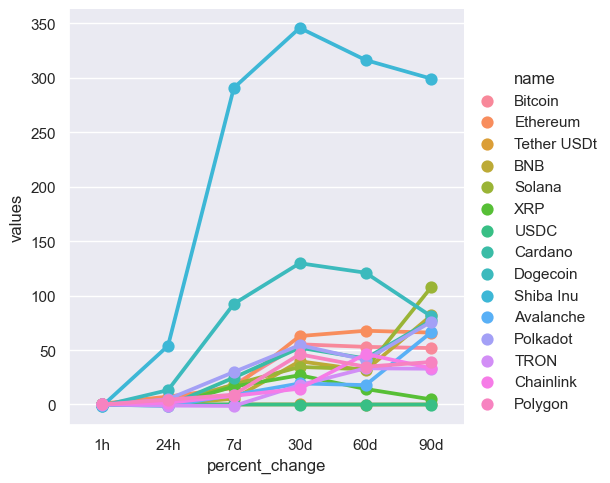

In [101]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [103]:
df10 = df[['name','quote.USD.price','timestamp' ]]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,66865.68653,2024-03-05 14:09:57.603158


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

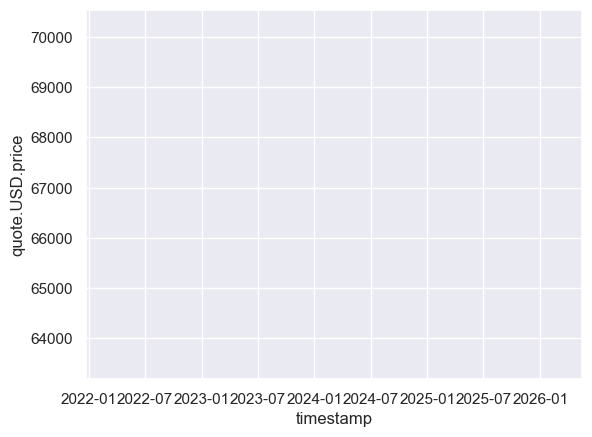

In [105]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)